![](encabezado.png)

---

# Corrección de Bouguer de anomalías gravimétricas

---

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import harmonica as hm
import xarray as xr
import os

Se definen funciones para convertir un arreglo 1D en una matriz 2D con las coordenadas correctas, basándose en el orden de las coordenadas.

In [19]:
def make2d(datafile:str, label:str, save=False):
	"""Convierte un vector 1D en una matriz 2D basándose en sus coordenadas

	Args:
		datafile (str): Archivo que contiene los valores y coordenadas
		save (bool, optional): Decide si guardar o no el archivo convertido. Defaults to False.

	Returns:
		ndarray: Matriz 2D con valores y coordenadas corregidas
	"""	
	data = pd.read_fwf(datafile, header=None, widths=[10,10,10])
	data.columns = ['x', 'y', 'z']

	x,y,z = data.x.to_numpy(), data.y.to_numpy(), data.z.to_numpy()

	xi = np.linspace(min(np.unique(x)), max(np.unique(x)), len(np.unique(x)))
	yi = np.linspace(min(np.unique(y)), max(np.unique(y)), len(np.unique(y)))

	print(f'Extent: ({-round(360-min(xi),4)}, {-round(360-max(xi),4)}), ({min(yi)}, {max(yi)})')

	X, Y = np.meshgrid(xi,yi)
	mindim = np.min(X.shape)
	Z = np.reshape(z, X.shape)
	# Z = Z[:mindim, :mindim]
	print(f'Size: {Z.shape}')

	name = os.path.basename(datafile)
	if save:
		np.savetxt(f'{name[3:]}', Z)
		print('Saved!')

	plt.imshow(Z, aspect='equal', cmap='jet', interpolation='spline36', origin='upper')
	plt.gca().set(xlabel='X', ylabel='Y')
	plt.colorbar(label=label)

	plt.show()

	return Z

def bouguer(gravfile, topofile):
	"""Calcula la corrección de Bouguer

	Args:
		gravfile (str): Archivo con los datos de gravedad en 2D
		topofile (str): Archivo con los datos de topografía en 2D

	Returns:
		ndarray: Matriz 2D de gravedad con la corrección de Bouguer
	"""	
	grav = np.loadtxt(gravfile)
	topo = np.loadtxt(topofile)

	topoxr = xr.DataArray(topo.ravel())
	boug = hm.bouguer_correction(topoxr).to_numpy()

	grav_corrected = grav.ravel() - boug
	grav_corrected = grav_corrected.reshape(grav.shape)

	name = os.path.basename(gravfile)
	np.savetxt(f'{name.split(".")[0]}_bouguer.txt', grav_corrected)
	print('Saved!')

	plt.imshow(grav_corrected, aspect='equal', cmap='jet', interpolation='spline36', origin='upper')
	plt.colorbar(label='mGal')
	plt.title('Bouguer Anomaly')
	plt.show()

	return grav_corrected


Extent: (-90.875, -88.5917), (19.6922, 22.1054)
Size: (156, 138)
Saved!


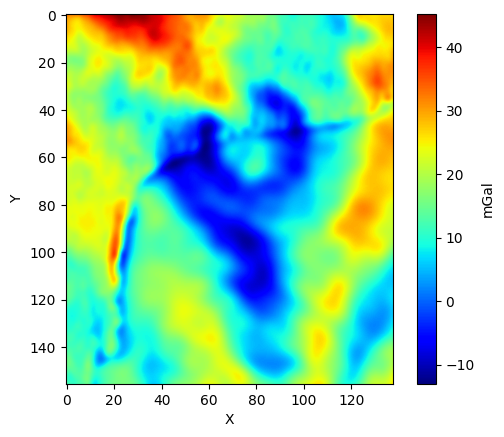

Extent: (-90.875, -88.5917), (19.6922, 22.1054)
Size: (156, 138)
Saved!


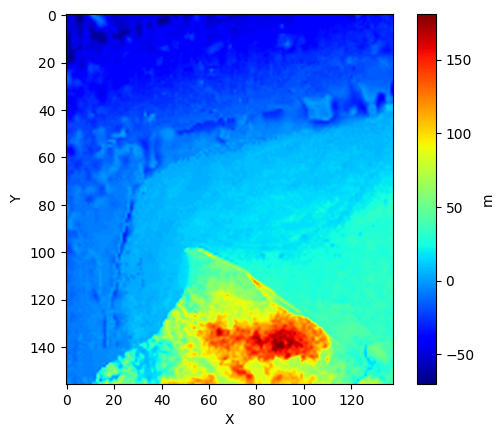

Saved!


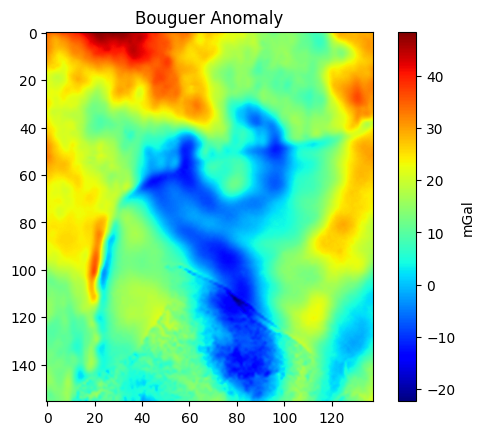

In [21]:
gravf = r'RAWchicxulub_grav.txt'
topof = r'RAWchicxulub_topo.txt'
make2d(gravf, label='mGal', save=True)
make2d(topof, label='m', save=True)

grav2d = r'chicxulub_grav.txt'
topo2d = r'chicxulub_topo.txt'
chicb = bouguer(grav2d, topo2d)